In [ ]:
%load_ext autoreload
%autoreload 2


In [61]:
from __future__ import print_function
import numpy as np
from enlib import enmap,utils
from orphics import io,maps
import yaml,os,sys

We load the geometry of the big map

In [62]:
froot = "/gpfs01/astro/workarea/msyriac/data/act/maps/s16/coadd/"
fname = froot+"f150_daynight_all_map_mono.fits"
shape,wcs = enmap.read_fits_geometry(fname)

# XMM -- a region that *does not* straddle ra=180deg

In [63]:
with open(os.environ['HOME']+"/repos/pvt_config/actpol_maps.yaml",'r') as f:
    hconfig = yaml.load(f)                                                                                                                 
region = "xmm"
box = np.array([float(x) for x in hconfig['patches'][region].split(',')]).reshape((2,2))*np.pi/180.
print(box)

ibox = enmap.subinds(shape, wcs, box, inclusive=False)
sel = utils.sbox2slice(ibox.T)
a = enmap.read_fits(fname,sel=sel)

[[-0.12217305  0.49741884]
 [-0.02617994  0.68940505]]


(3, 660, 1321)
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[-3419,841]}
Area sq.deg. 60.3561905232


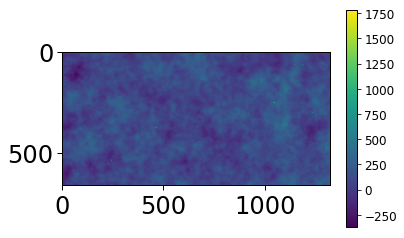

In [67]:
print(a.shape)
print(a.wcs)
print("Area sq.deg.", a.area()*(180./np.pi)**2.)
io.plot_img(a[0])

In [68]:
b = enmap.read_fits(fname,box=box)
print(b.shape)
print(b.wcs)
print("Area sq.deg.", b.area()*(180./np.pi)**2.)

(3, 660, 1321)
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[-3419,841]}
Area sq.deg. 60.3561905232


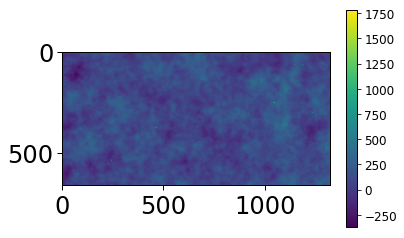

In [47]:
io.plot_img(b[0])

In [39]:
c = enmap.read_fits(fname)

(3, 660, 1321)
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[-3419,841]}
60.3561905232


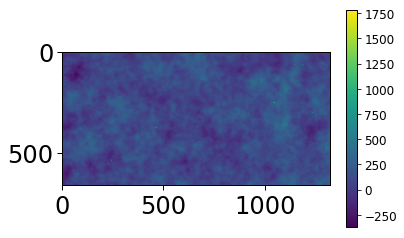

In [48]:
d = c.submap(box)
print(d.shape)
print(d.wcs)
print(d.area()*(180./np.pi)**2.)
io.plot_img(d[0])

# WIDE12H -- a region that straddles ra=180deg

In [52]:
region = "wide12h"
box = np.array([float(x) for x in hconfig['patches'][region].split(',')]).reshape((2,2))*np.pi/180.
print(box*180./np.pi)
exp_area = (box[1,0]-box[0,0])*(box[1,1]-box[0,1])*(180./np.pi)**2.
print(exp_area)

[[  -1.75  183.  ]
 [   1.5   175.  ]]
-26.0


In [53]:
ibox = enmap.subinds(shape, wcs, box, inclusive=False)
sel = utils.sbox2slice(ibox.T)
a = enmap.read_fits(fname,sel=sel)

(3, 390, 359)
car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[-2.124e+04,211]}
9.7215937694


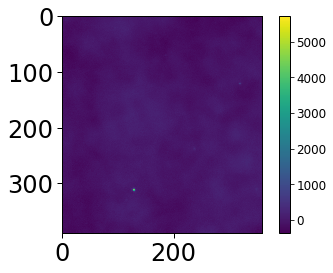

In [54]:
print(a.shape)
print(a.wcs)
print(a.area()*(180./np.pi)**2.)
io.plot_img(a[0])

(3, 390, 959)
car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[-2.124e+04,211]}
25.9693824368


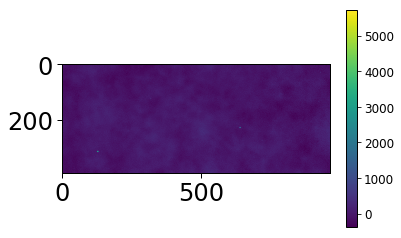

In [56]:
b = enmap.read_fits(fname,box=box)
print(b.shape)
print(b.wcs)
print(b.area()*(180./np.pi)**2.)
io.plot_img(b[0])

(3, 390, 959)
car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[-2.124e+04,211]}
25.9693824368


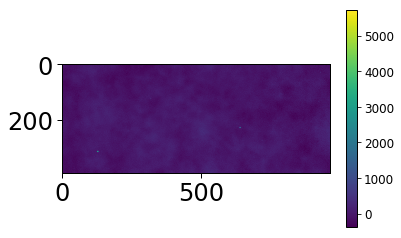

In [57]:
d = c.submap(box)
print(d.shape)
print(d.wcs)
print(d.area()*(180./np.pi)**2.)
io.plot_img(d[0])